<a href="https://colab.research.google.com/github/chaudhary-dotcom/Data-Gathering-/blob/master/webScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

In [225]:
import pandas as pd
import requests
from bs4 import BeautifulSoup #It is a library used for webscriping

### Step 1: Installing web scriping library

In [ ]:
!pip install beautifulsoup4


In [ ]:
url = 'https://edusanjal.com/college/'
response = requests.get(url) #It returns a response object

webpage = response.text #Decoded HTML content of webpage as a string.

soup = BeautifulSoup(webpage, 'lxml') #Passing the HTML string to beautifulsoup for parasing
print(soup.title)

<title>Colleges in Nepal - Edusanjal</title>


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Colleges in Nepal - Edusanjal
  </title>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-MJNNBE6XYD" type="text/javascript">
  </script>
  <style>
   *,:after,:before{--tw-border-spacing-x:0;--tw-border-spacing-y:0;--tw-translate-x:0;--tw-translate-y:0;--tw-rotate:0;--tw-skew-x:0;--tw-skew-y:0;--tw-scale-x:1;--tw-scale-y:1;--tw-pan-x: ;--tw-pan-y: ;--tw-pinch-zoom: ;--tw-scroll-snap-strictness:proximity;--tw-gradient-from-position: ;--tw-gradient-via-position: ;--tw-gradient-to-position: ;--tw-ordinal: ;--tw-slashed-zero: ;--tw-numeric-figure: ;--tw-numeric-spacing: ;--tw-numeric-fraction: ;--tw-ring-inset: ;--tw-ring-offset-width:0px;--tw-ring-offset-color:#fff;--tw-ring-color:rgba(59,130,246,.5);--tw-ring-offset-shadow:0 0 #0000;--tw-ring-shadow:0 0 #0000;--tw-shadow:0 0 #0000;--tw-shadow-colored:0 0 #0000;--tw-b
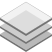
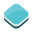

In [ ]:
print(soup.prettify()) # Nicely formated Unicode string

In [ ]:
soup.find_all('h1')[0].text

'Colleges in Nepal'

In [ ]:
len(soup.find_all('h2')) #getting all the h2 tag from webpage
colleges = soup.find_all('a', class_ = 'text-xl')
for college in colleges:
  print(college.text.strip())

Thames International College
Texas College of Management and IT
Ace Institute of Management
Kathford International College of Engineering and Management
People's Campus
Softwarica College of IT and E-commerce
Padmashree College
Certified College of Accountancy (CCA)
Techspire College
King's College
Nepal College of Information Technology (NCIT)
Janamaitri Multiple Campus
New Summit College
National College of Management and Technical Science (NCMT College)
Nepal College of Management
K and K International College
Public Youth Campus
Silver Mountain School of Hotel Management
Global College of Management
Prime College
Presidential Graduate School
KIST College & SS
NAMI College
Kantipur College of Management and Information Technology


In [ ]:
for i in soup.find_all('p'):
  print(i.text.strip())

# There is only this much text written in p tag

Showing 1 to 24 of 1518 results
Your Guide to Education in Nepal!
© 2025 Edu Sanjal Pvt. Ltd.
Developed by Awecode


In [ ]:
for i in soup.find_all('a'):
  print(i.text.strip())
#more than 90% of the content written in a tag


Edusanjal
Sign in
Sign up
Courses
Colleges
Schools
Degrees
Admissions
Vacancies
News
Exams
Blogs
Skills
Scholarships
Disciplines
Careers
Events
Videos
Rankings
Posts
Councils
Organizations
Universities
Global School of Science  Top 25 Scholarships  Registration Open
After-SEE Portal  Visit Now

Thames International College
Tribhuvan University

Texas College of Management and IT
Lincoln University College

Ace Institute of Management
Pokhara University
Cambridge GCE A Levels

Kathford International College of Engineering and Management
Tribhuvan University

People's Campus
National Examinations Board
Tribhuvan University

Softwarica College of IT and E-commerce
Coventry University, UK

Padmashree College
Tribhuvan University
Nilai University, Malaysia

Certified College of Accountancy (CCA)
ACCA

Techspire College
Asia Pacific University of Technology & Innovation

King's College
Westcliff University, CA, USA

Nepal College of Information Technology (NCIT)
Pokhara University

Janamait

In [ ]:
uni = soup.find_all('a', class_= 'class')
for i in uni:
  print(i.text.strip())

Tribhuvan University
Surya Bikram Gyawali Marg, Old Baneshwor, Kathmandu
Lincoln University College
Siphal, Kathmandu
Pokhara University, Cambridge GCE A Levels
Bibhuti Janak Marg, New Baneshwor, Kathmandu
Tribhuvan University
Balkumari, Lalitpur
National Examinations Board, Tribhuvan University
Paknajol, Kathmandu
Coventry University, UK
Dillibazar, Kathmandu
Tribhuvan University, Nilai University, Malaysia
Tinkune, Kathmandu
ACCA
Thapagaun, New Baneshwor, Kathmandu
Asia Pacific University of Technology & Innovation
New Baneshwor, Kathmandu
Westcliff University, CA, USA
Babar Mahal, Kathmandu
Pokhara University
Balkumari, Lalitpur
National Examinations Board, Tribhuvan University
Kuleshwor, Kathmandu
National Examinations Board, Tribhuvan University
Shantinagar Gate, New Baneshwor, Kathmandu
Lincoln University College
Samakhusi, Ranibari, Kathmandu
Kathmandu University
Dhobighat, Lalitpur
Tribhuvan University
New Baneshwor, Kathmandu
Tribhuvan University
Dhobichaur, Kathmandu
American

In [226]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

# Initialize an empty LIST to store DataFrames from each page
all_pages_data = []

for j in range(1, 80):
    print(f"Scraping page {j}...")
    webpage = requests.get('https://edusanjal.com/college/?page={}'.format(j)).text
    soup = BeautifulSoup(webpage, 'lxml')

    college_list = soup.find_all('div', class_='p-5')

    colleges = []
    university = []
    address = []

    for i in college_list:
        # Extract College Name
        try:
            college_name_tag = i.find('a', class_='text-xl')
            if college_name_tag:
                colleges.append(college_name_tag.text.strip())
            else:
                colleges.append(np.nan)
        except Exception as e:
            colleges.append(np.nan)

        # Extract University/Accreditation
        try:
            university_tag = i.find('li', title='Accreditation')
            if university_tag:
                univ_link_tag = university_tag.find('a')
                if univ_link_tag:
                    university.append(univ_link_tag.text.strip())
                else:
                    university.append(university_tag.text.strip())
            else:
                university.append(np.nan)
        except Exception as e:
            university.append(np.nan)

        # Extract Address (Re-verify this part if still getting NaNs for address)
        # Based on previous discussions, this should be:
        try:
            address_li_tag = i.find('li', title='Address')
            if address_li_tag:
                address_span_tag = address_li_tag.find('span', class_='ml-2')
                if address_span_tag:
                    address.append(address_span_tag.text.strip())
                else:
                    address.append(np.nan)
            else:
                address.append(np.nan)
        except Exception as e:
            address.append(np.nan)

    # Create a DataFrame for the current page's data
    df_current_page = pd.DataFrame({
        'College Name': colleges,
        'University': university,
        'Location': address,
    })

    # Append the DataFrame for the current page to the list
    all_pages_data.append(df_current_page)

# AFTER THE LOOP, concatenate all DataFrames from the list
final_df = pd.concat(all_pages_data, ignore_index=True)

print("\nScraping complete!")
print("Final DataFrame head:")
final_df.head()


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

,College Name,University,Location
0,Thames International College,Tribhuvan University,"Surya Bikram Gyawali Marg, Old Baneshwor, Kath..."
1,Texas College of Management and IT,Lincoln University College,"Siphal, Kathmandu"
2,Ace Institute of Management,Pokhara University,"Bibhuti Janak Marg, New Baneshwor, Kathmandu"
3,Kathford International College of Engineering ...,Tribhuvan University,"Balkumari, Lalitpur"
4,People's Campus,National Examinations Board,"Paknajol, Kathmandu"


In [227]:
final_df.shape

(1518, 3)

In [229]:
final_df.head(30)

,College Name,University,Location
0,Thames International College,Tribhuvan University,"Surya Bikram Gyawali Marg, Old Baneshwor, Kath..."
1,Texas College of Management and IT,Lincoln University College,"Siphal, Kathmandu"
2,Ace Institute of Management,Pokhara University,"Bibhuti Janak Marg, New Baneshwor, Kathmandu"
3,Kathford International College of Engineering ...,Tribhuvan University,"Balkumari, Lalitpur"
4,People's Campus,National Examinations Board,"Paknajol, Kathmandu"
5,Softwarica College of IT and E-commerce,"Coventry University, UK","Dillibazar, Kathmandu"
6,Padmashree College,Tribhuvan University,"Tinkune, Kathmandu"
7,Certified College of Accountancy (CCA),ACCA,"Thapagaun, New Baneshwor, Kathmandu"
8,Techspire College,Asia Pacific University of Technology & Innova...,"New Baneshwor, Kathmandu"
9,King's College,"Westcliff University, CA, USA","Babar Mahal, Kathmandu"


In [233]:
#Save to csv file
colleges_nepal = final_df.to_csv('Colleges.csv', index=False)

In [237]:
df = pd.read_csv('/content/Colleges.csv')
df.isnull().sum()

,0
College Name,0
University,35
Location,0


In [245]:
# Handaling Missing Values
university_mode = df['University'].mode()[0]
df['University'].fillna(university_mode, inplace=True)
df['University'].isnull().sum()

df.isnull().sum()


,0
College Name,0
University,0
Location,0
